In [67]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

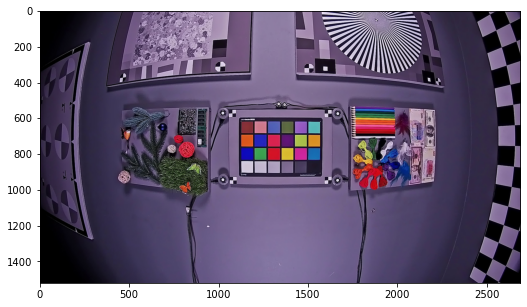

In [68]:
img = cv2.imread('purple_tint.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

[0.94736842 1.         0.92093023]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f9d778c3730>)

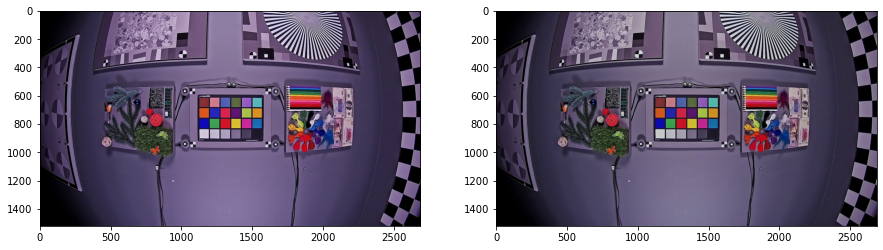

In [69]:
# Define white patch and the coefficients
row, col = 870, 1155 
white = img[row, col, :]
#coeffs = 255.0/white
coeffs = white[1]/white # better result for white balance
print(coeffs)

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

[0.8404271270132808, 1, 0.7103595473546209]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f9d77314460>)

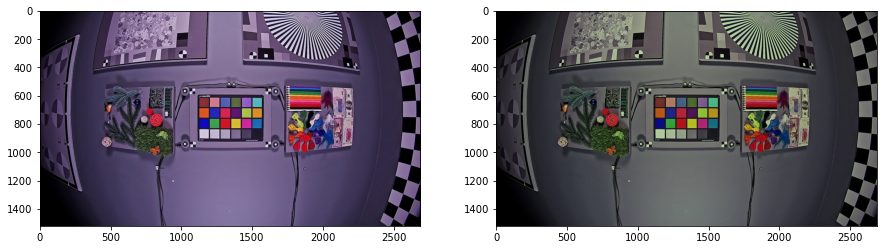

In [70]:
# Load your image
img = cv2.imread('purple_tint.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r, mean_g, mean_b, x  = cv2.mean(img)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = mean_g / mean_r
kg = 1
kb = mean_g / mean_b
coeffs = [kr, kg, kb]
print(coeffs)

# Apply color balancing and generate the balanced image
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

255 255 255


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f9d7738c8b0>)

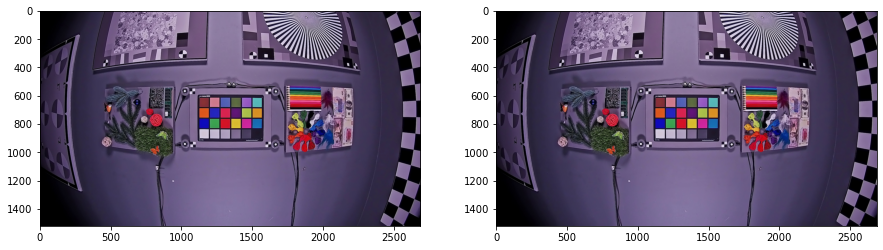

In [71]:
# Load your image
img = cv2.imread('purple_tint.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
red, green, blue = cv2.split(img)
max_r = np.max(red)
max_g = np.max(green)
max_b = np.max(blue)
print(max_r, max_g, max_b)

# Apply scale-by-max balancing and generate the balanced image
balanced = cv2.merge([red/max_r, green/max_g, blue/max_b])

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)